In [15]:
from clique_benchmark import Trials, CompileType
from graph_database import Graphs, Graph
import matplotlib.pyplot as plt
import numpy as np
graph_db = Graphs()
trial_db = Trials()

In [16]:
# run this cell to load the job results for all trials that are waiting pending job results
await trial_db.load_results()

Found 2328 jobs with missing results
Processing batch 1 of 117
Error fetching results for job d0ecqb5ehmr0008fvy3g: 'Unable to retrieve job result. Error code 9703; Internal error -- https://ibm.biz/error_codes#9703'
Error fetching results for job d0ecqadvpqf00083y70g: 'Unable to retrieve job result. Error code 9699; Internal Error -- https://ibm.biz/error_codes#9699'
Processing batch 2 of 117
Processing batch 3 of 117
Processing batch 4 of 117
Processing batch 5 of 117
Processing batch 6 of 117
Processing batch 7 of 117
Processing batch 8 of 117
Processing batch 9 of 117
Processing batch 10 of 117
Processing batch 11 of 117
Processing batch 12 of 117
Processing batch 13 of 117
Processing batch 14 of 117
Processing batch 15 of 117
Processing batch 16 of 117
Processing batch 17 of 117
Processing batch 18 of 117
Processing batch 19 of 117
Processing batch 20 of 117
Processing batch 21 of 117
Processing batch 22 of 117
Processing batch 23 of 117
Processing batch 24 of 117
Processing batch

In [17]:
for grover_iterations in range(1, 6):
    print(f"Grover iterations: {grover_iterations}")
    for trial in trial_db.get(grover_iterations=grover_iterations):
        print(f"Trial {trial.trial_id} with graph: {trial.graph}")
        print(sorted(trial.counts.items(), key=lambda t: t[1], reverse=True))
        print(sorted(trial.simulation_counts.items(), key=lambda t: t[1], reverse=True))
        print(trial.success_rate)
        print(trial.simulation_success_rate)
        print(trial.expected_success_rate)
        print("")

Grover iterations: 1
Trial 1 with graph: 001
[('010', 148), ('111', 144), ('110', 143), ('000', 136), ('011', 121), ('001', 107), ('100', 105), ('101', 96)]
[('110', 474), ('111', 96), ('010', 82), ('001', 77), ('101', 71), ('100', 71), ('000', 67), ('011', 62)]
0.143
0.474
0.7812500000000001

Trial 3 with graph: 100
[('101', 159), ('111', 139), ('011', 135), ('010', 133), ('001', 120), ('110', 116), ('100', 106), ('000', 92)]
[('011', 485), ('000', 80), ('100', 78), ('110', 77), ('010', 75), ('001', 74), ('111', 66), ('101', 65)]
0.135
0.485
0.7812500000000001

Trial 5 with graph: 011
[('011', 277), ('010', 147), ('100', 139), ('000', 112), ('001', 107), ('110', 87), ('101', 68), ('111', 63)]
[('110', 511), ('101', 489)]
0.155
1.0
1.0

Trial 6 with graph: 010
[('010', 150), ('111', 138), ('000', 137), ('110', 135), ('101', 119), ('011', 111), ('001', 106), ('100', 104)]
[('101', 469), ('100', 82), ('000', 81), ('111', 79), ('110', 77), ('011', 74), ('001', 71), ('010', 67)]
0.119
0.46

AttributeError: 'NoneType' object has no attribute 'items'

In [18]:
def get_probability_data(trial_db, compile_type=None):
    n_data = []
    grover_iterations_data = []
    probability_data = []

    for n in range(2, 21):
        for grover_iterations in range(1, 6):
            print(f"(n, grover_iterations) = ({n}, {grover_iterations})")
            trials = trial_db.get(n=n, grover_iterations=grover_iterations, compile_type=compile_type)

            if len(trials) == 0:
                print(f"Warning: no results for {n} variables, complexity {grover_iterations}; skipping")
                continue

            success_rates = np.zeros(len(trials))
            expected_success_rates = np.zeros(len(trials))

            for i, trial in enumerate(trials):
                success_rates[i] = trial.success_rate
                expected_success_rates[i] = trial.expected_success_rate
            
            n_data.append(n)
            grover_iterations_data.append(grover_iterations)
            probability_data.append(np.mean(success_rates / expected_success_rates))
            print(f"Mean success rate over expected: {probability_data[-1]}")
    
    return n_data, grover_iterations_data, probability_data

def plot_probability_data(n_data, grover_iterations_data, probability_data, title, filepath=None):
    plt.figure(figsize=(20, 10))
    plt.scatter(n_data, grover_iterations_data, c=probability_data, cmap='RdYlGn', edgecolors='black', alpha=0.75, s=450)
    plt.xticks(np.arange(min(n_data), max(n_data) + 1, 1))
    plt.yticks(np.arange(min(grover_iterations_data), max(grover_iterations_data) + 1, 1))

    plt.xlabel('Verticies Count')
    plt.ylabel('Grover Iterations')
    plt.title(title)
    cbar = plt.colorbar()
    if filepath is not None:
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

In [19]:
n_data, grover_iterations_data, probability_data = get_probability_data(trial_db, compile_type=CompileType.CLASSICAL_FUNCTION)

(n, grover_iterations) = (2, 1)
(n, grover_iterations) = (2, 2)
(n, grover_iterations) = (2, 3)
(n, grover_iterations) = (2, 4)
(n, grover_iterations) = (2, 5)
(n, grover_iterations) = (3, 1)
Mean success rate over expected: 0.3145266666666667
(n, grover_iterations) = (3, 2)
Mean success rate over expected: 0.13505234159779614
(n, grover_iterations) = (3, 3)
(n, grover_iterations) = (3, 4)
(n, grover_iterations) = (3, 5)
(n, grover_iterations) = (4, 1)
Mean success rate over expected: 0.2589380081752842
(n, grover_iterations) = (4, 2)
Mean success rate over expected: 0.11800978290885696
(n, grover_iterations) = (4, 3)
Mean success rate over expected: 0.06328111194002212
(n, grover_iterations) = (4, 4)
(n, grover_iterations) = (4, 5)
(n, grover_iterations) = (5, 1)
Mean success rate over expected: 0.2298588708175571
(n, grover_iterations) = (5, 2)
Mean success rate over expected: 0.09513603367675454
(n, grover_iterations) = (5, 3)
Mean success rate over expected: 0.05788676830916716
(n,

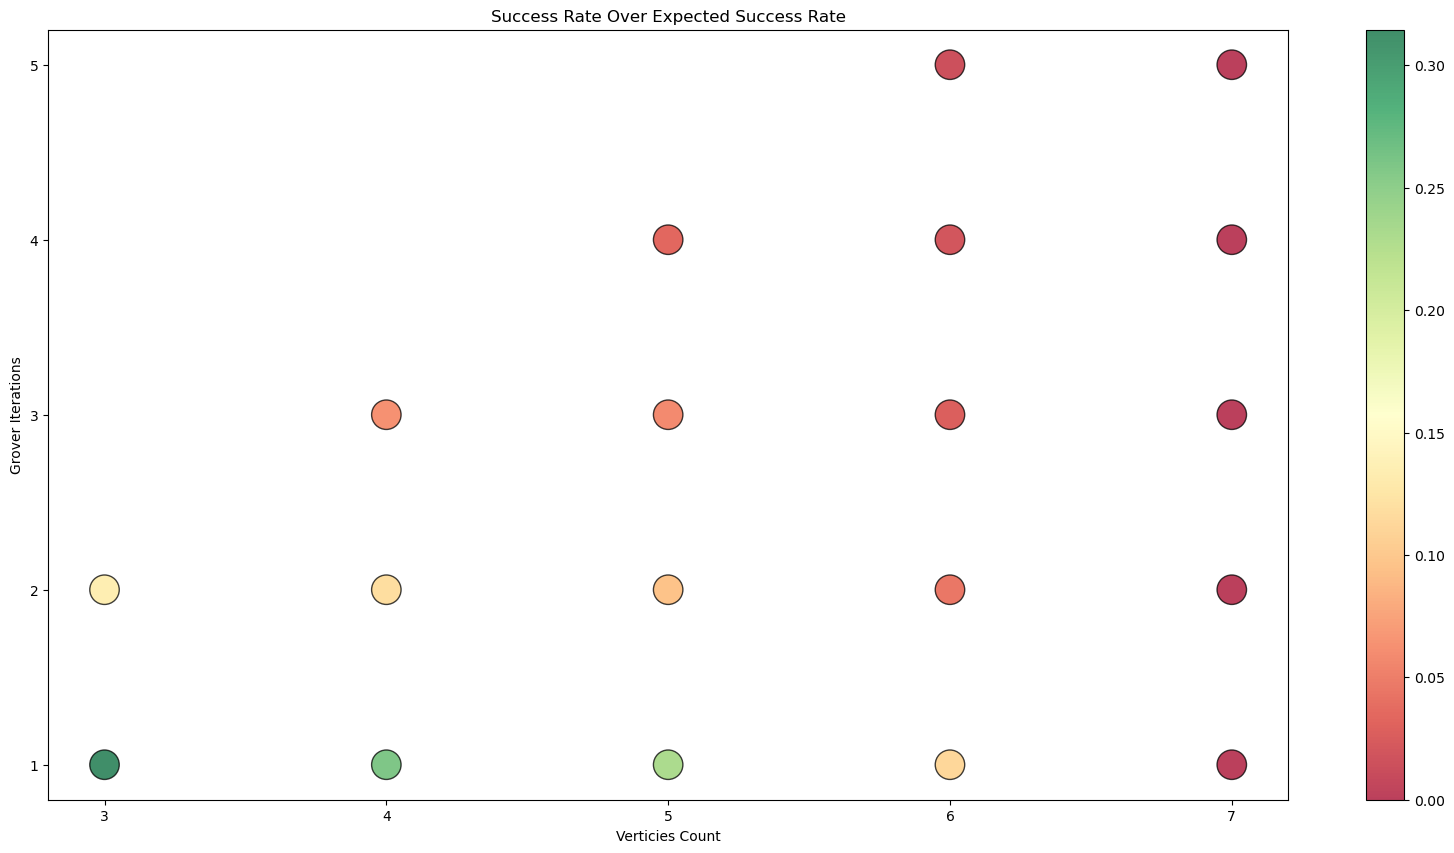

In [20]:
plot_probability_data(n_data, grover_iterations_data, probability_data, "Success Rate Over Expected Success Rate (Classical Function)", filepath="classical_function_mean_success_rate_over_expected.png")

(n, grover_iterations) = (2, 1)
(n, grover_iterations) = (2, 2)
(n, grover_iterations) = (2, 3)
(n, grover_iterations) = (2, 4)
(n, grover_iterations) = (2, 5)
(n, grover_iterations) = (3, 1)
Mean success rate over expected: 0.21926
(n, grover_iterations) = (3, 2)
Mean success rate over expected: 0.1435151515151515
(n, grover_iterations) = (3, 3)
(n, grover_iterations) = (3, 4)
(n, grover_iterations) = (3, 5)
(n, grover_iterations) = (4, 1)
Mean success rate over expected: 0.25319940750583314
(n, grover_iterations) = (4, 2)
Mean success rate over expected: 0.11768841089444057
(n, grover_iterations) = (4, 3)
Mean success rate over expected: 0.06848229922276367
(n, grover_iterations) = (4, 4)
(n, grover_iterations) = (4, 5)
(n, grover_iterations) = (5, 1)
Mean success rate over expected: 0.22240998810280338
(n, grover_iterations) = (5, 2)
Mean success rate over expected: 0.10314139818340896
(n, grover_iterations) = (5, 3)
Mean success rate over expected: 0.057713366655688325
(n, grover_i

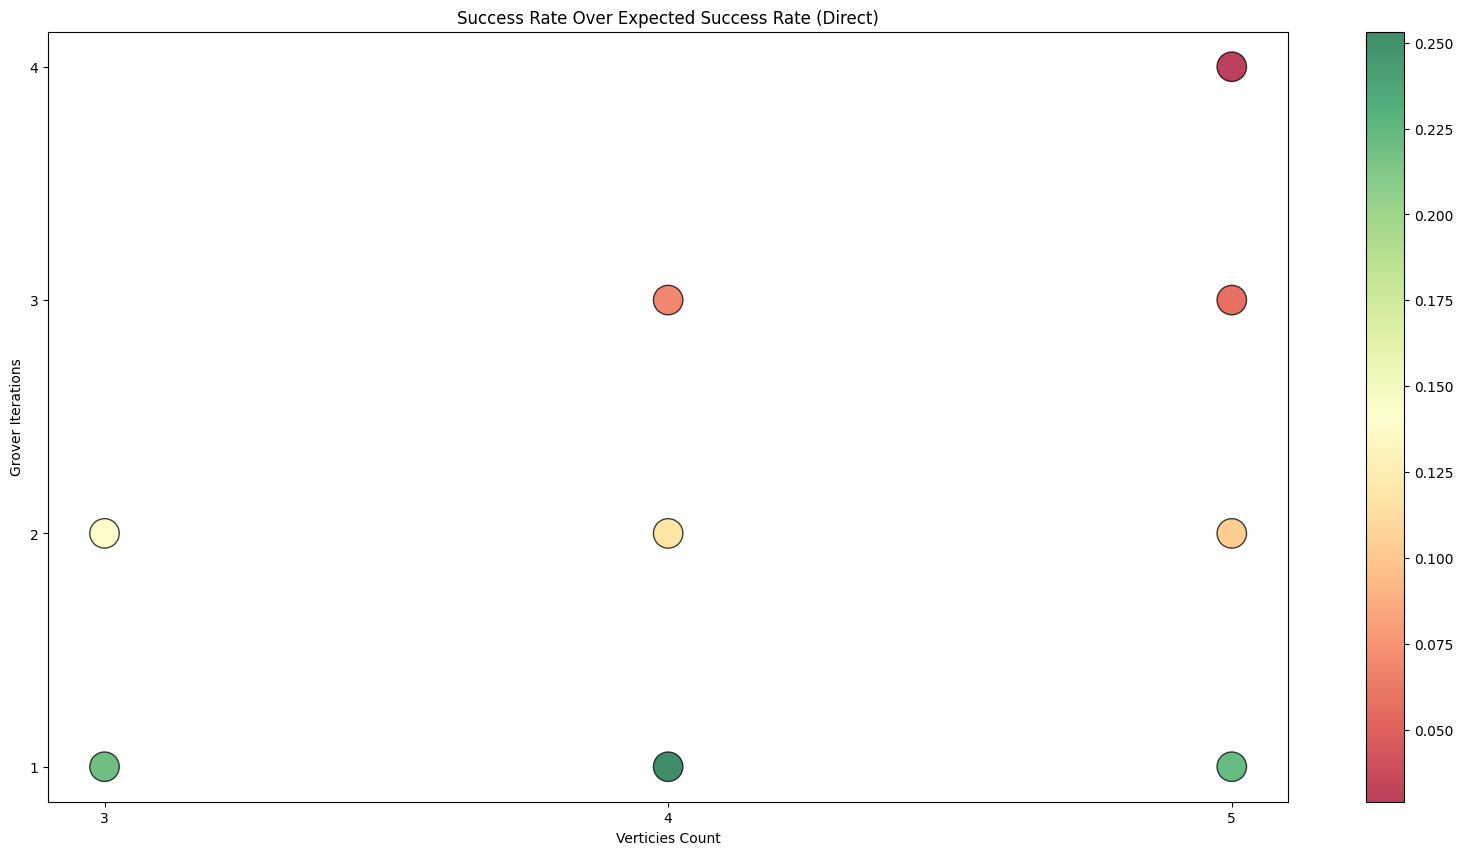

In [5]:
n_data, grover_iterations_data, probability_data = get_probability_data(trial_db, compile_type=CompileType.DIRECT)
plot_probability_data(n_data, grover_iterations_data, probability_data, "Success Rate Over Expected Success Rate (Direct)", filepath="direct_mean_success_rate_over_expected.png")

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def simple_visualize_results(results_dict, title="Quantum Measurement Results"):
    """
    A simple visualization for quantum measurement results.
    
    Parameters:
    -----------
    results_dict : dict
        Dictionary with quantum states as keys and counts as values
    title : str, optional
        Title for the visualization
    """
    # Basic calculations
    total_samples = sum(results_dict.values())
    n_qubits = len(list(results_dict.keys())[0])
    
    # Sort results by count (descending)
    sorted_results = dict(sorted(results_dict.items(), key=lambda x: x[1], reverse=True))
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1. Bar chart of states
    bars = ax1.bar(range(len(sorted_results)), sorted_results.values(), color='skyblue')
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    # Set the x-tick positions and labels
    ax1.set_xticks(range(len(sorted_results)))
    ax1.set_xticklabels(list(sorted_results.keys()), rotation=70, fontsize=9)
    
    # Add uniform expectation line
    expected_uniform = total_samples / len(results_dict)
    ax1.axhline(y=expected_uniform, color='red', linestyle='--', 
                label=f'Expected Uniform: {expected_uniform:.1f}')
    
    ax1.set_title('Measurement Counts')
    ax1.set_xlabel('State')
    ax1.set_ylabel('Count')
    ax1.legend()
    
    # 2. Bit frequencies
    bit_counts = np.zeros(n_qubits)
    
    for state, count in results_dict.items():
        for i, bit in enumerate(state):
            if bit == '1':
                bit_counts[i] += count
    
    bit_frequencies = bit_counts / total_samples
    
    bars = ax2.bar(range(n_qubits), bit_frequencies, color='lightgreen')
    ax2.axhline(0.5, color='red', linestyle='dashed', label='Ideal (0.5)')
    
    # Add frequency values on top of bars
    for bar, freq in zip(bars, bit_frequencies):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{freq:.3f}', ha='center', va='bottom')
    
    ax2.set_ylim(0, 1)
    ax2.set_title('Bit Frequencies')
    ax2.set_xlabel('Qubit Index')
    ax2.set_ylabel('Frequency of |1⟩ State')
    ax2.set_xticks(range(n_qubits))
    ax2.set_xticklabels([f'q{i}' for i in range(n_qubits)])
    ax2.legend()
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Print simple statistics
    print(f"Total samples: {total_samples}")
    print(f"Highest state: {list(sorted_results.keys())[0]} ({list(sorted_results.values())[0]} counts, {list(sorted_results.values())[0]/total_samples*100:.2f}%)")
    print(f"Lowest state: {list(sorted_results.keys())[-1]} ({list(sorted_results.values())[-1]} counts, {list(sorted_results.values())[-1]/total_samples*100:.2f}%)")
    
    # Check for clear winner (probability > 20%)
    top_prob = list(sorted_results.values())[0] / total_samples
    if top_prob > 0.2:
        print(f"✓ Strong signal detected in state {list(sorted_results.keys())[0]} ({top_prob*100:.1f}%)")
    else:
        print(f"⚠ No clear winner detected. Top state has only {top_prob*100:.1f}% probability")
    
    # Check for uniformity
    uniformity_threshold = 0.05  # 5% variation
    max_variation = max(abs(count/total_samples - 1/len(results_dict)) for count in results_dict.values())
    
    if max_variation < uniformity_threshold:
        print(f"⚠ Distribution appears close to uniform (max variation: {max_variation*100:.1f}%)")
    
    # Return a simple summary for programmatic use
    return {
        "total_samples": total_samples,
        "top_state": list(sorted_results.keys())[0],
        "top_probability": top_prob,
        "bit_frequencies": {f"q{i}": freq for i, freq in enumerate(bit_frequencies)}
    }

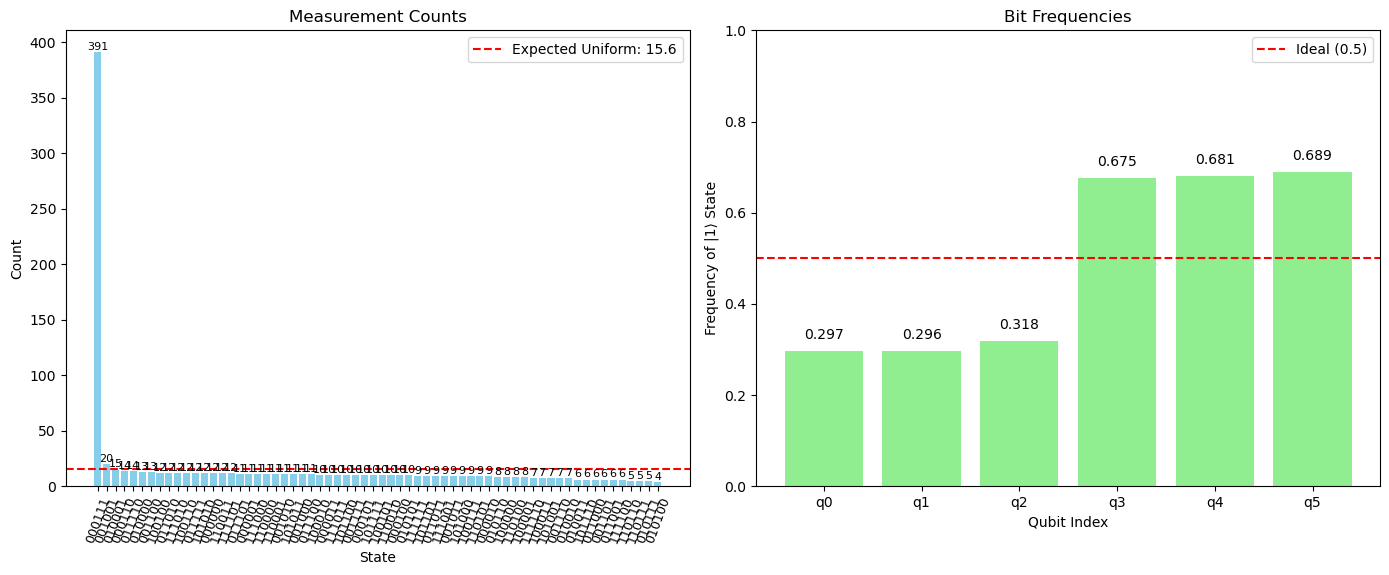

Total samples: 1000
Highest state: 000111 (391 counts, 39.10%)
Lowest state: 010100 (4 counts, 0.40%)
✓ Strong signal detected in state 000111 (39.1%)


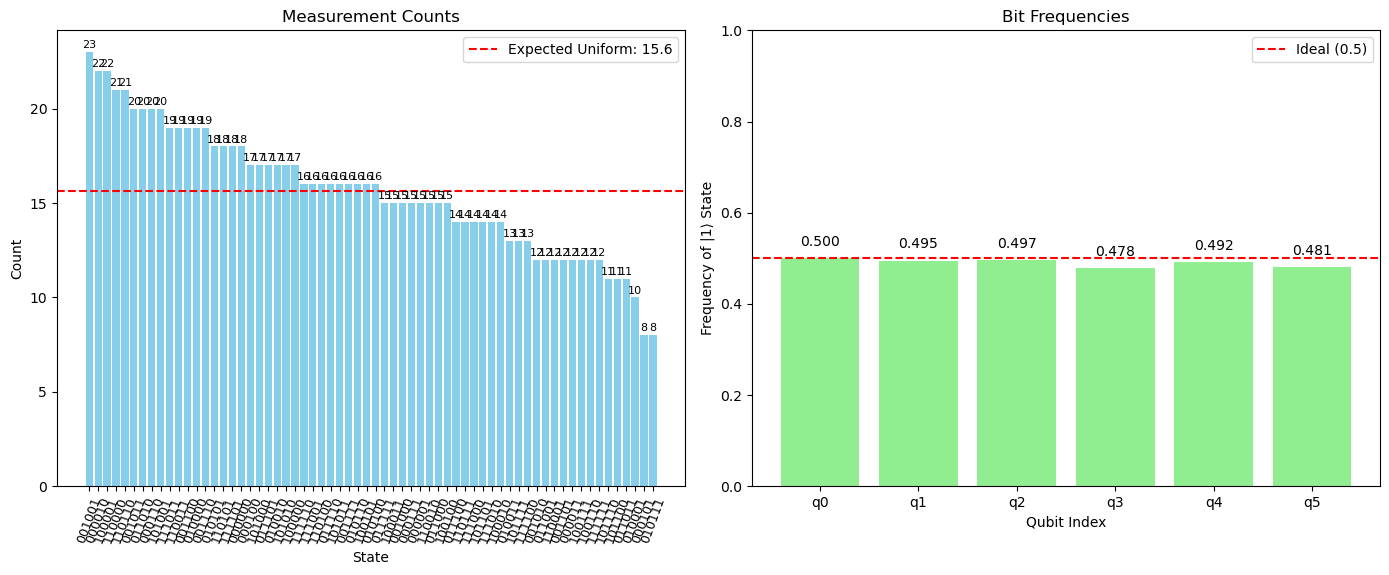

Total samples: 1000
Highest state: 001001 (23 counts, 2.30%)
Lowest state: 010111 (8 counts, 0.80%)
⚠ No clear winner detected. Top state has only 2.3% probability
⚠ Distribution appears close to uniform (max variation: 0.8%)


{'total_samples': 1000,
 'top_state': '001001',
 'top_probability': 0.023,
 'bit_frequencies': {'q0': np.float64(0.5),
  'q1': np.float64(0.495),
  'q2': np.float64(0.497),
  'q3': np.float64(0.478),
  'q4': np.float64(0.492),
  'q5': np.float64(0.481)}}

In [14]:
trial_id = 897
trial = trial_db.get(trial_id=trial_id)[0]

simple_visualize_results(trial.simulation_counts, "")
simple_visualize_results(trial.counts, "")